# Identification of PTM model

To allow inline pictures, run the following block

In [1]:
%matplotlib inline

# Introduction and setup

Import all the useful libraries for Python:
* numpy : for manipulation of data
* scipy : for scientific computations
* matplotlib : for plotting
* pandas : for IO with Excel

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

colors = ['red','green','blue','purple','orange','black', 'yellow', 'pink', 'brown']

## Import experimental data

In [3]:
# Define initial or reference conditions 
T0 = 900
epsp0 = 0.1

In [4]:
excelData = pd.read_excel('ExperimentsTreated1.xlsx', None) # Data grouped according to strain rates

In [5]:
excelData_exp = pd.read_excel('ExperimentsTreated.xlsx', None) # Data grouped according to strain rates

In [6]:
excelData1 = pd.read_excel('ExperimentsTreated2.xlsx', None) # Data grouped according to temperatures

## Extract reference strain rate's data

In [7]:
dataSheet = excelData[str(epsp0)]

Extract temperature values

In [8]:
tp = []
for i in range(1, dataSheet.shape[1]):
    tp.append(dataSheet.columns[i])
tp = np.array(tp)
T  = tp-T0 
tp, T

(array([750, 800, 850]), array([-150, -100,  -50]))

Extract strain rate values

In [9]:
epsp = []
sp = list(excelData.keys())
for s in sp:
    epsp.append(float(s))
epsp = np.array(epsp)
ep   = epsp/epsp0
epsp, ep

(array([0.001, 0.01 , 0.1  ]), array([0.01, 0.1 , 1.  ]))

Extract data of reference condition

In [10]:
data = dataSheet.values
eps  = data[:,0]
sig  = data[:,1:]
logsig = np.log(sig)
eps, sig, logsig

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 ]),
 array([[221.31514625, 187.53078358, 144.38150721],
        [284.15701059, 218.9634145 , 169.64750835],
        [302.6100173 , 230.4918406 , 180.095612  ],
        [305.65636802, 232.9587445 , 185.44991599],
        [297.4026128 , 224.52131029, 179.98325304],
        [280.21652358, 215.30939729, 173.60302146],
        [259.98547593, 206.09662975, 165.80957807],
        [242.05147684, 197.94007925, 157.78080699],
        [231.65760605, 190.90331922, 153.15301809],
        [226.24871724, 183.43228647, 148.0159761 ],
        [222.64230013, 179.05182475, 144.61676363],
        [216.45357282, 176.81568622, 141.72178778],
        [209.37628895, 171.16768392, 137.18004573],
        [208.11256404, 170.147823  , 136.9544372 ]]),
 array([[5.39958769, 5.23394301, 4.97245915],
        [5.64952694, 5.38890466, 5.1337228 ],
        [5.7124449 , 5.44021546, 5.19348789],
        [5.72246149, 5.4508613

## Define de constitutive law

In [11]:
def constitutiveLaw(T, I1, S1):
    return I1 + S1*T 

## Curve_fit identification

 ## S1 and I1

In [12]:
# Create empty lists
I1 = []
S1 = []
for i in range(len(eps)):
    sig_i = logsig[i, :]
    popt, pcov = curve_fit(constitutiveLaw, T, sig_i)
    I_i, S_i = popt
    I1.append(I_i)
    S1.append(S_i)
J = np.exp(I1)

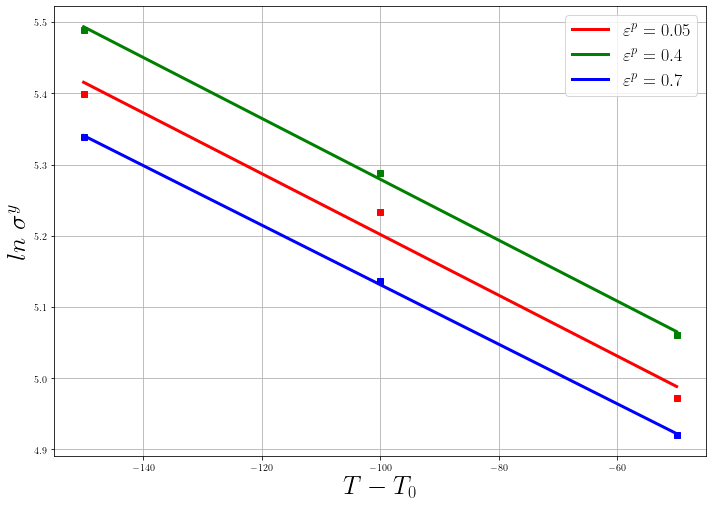

In [13]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
n=13
i=0
for n in [0,7,13]:
    plt.plot(T,logsig[n,:], colors[i],marker='s',linewidth=0)
    plt.plot(T,constitutiveLaw(T,I1[n],S1[n]),colors[i],label=r'$\varepsilon^p = '+str(eps[n])+'$', linewidth = 3)
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    i=i+1
plt.legend(numpoints=1)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$T - T_0$', fontsize = 26) # Labels the x axis
plt.ylabel(r'$ln\ \sigma^y$', fontsize = 26) # Labels the y axis
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 18)
plt.show()

Plot the curve of I to see if it looks good


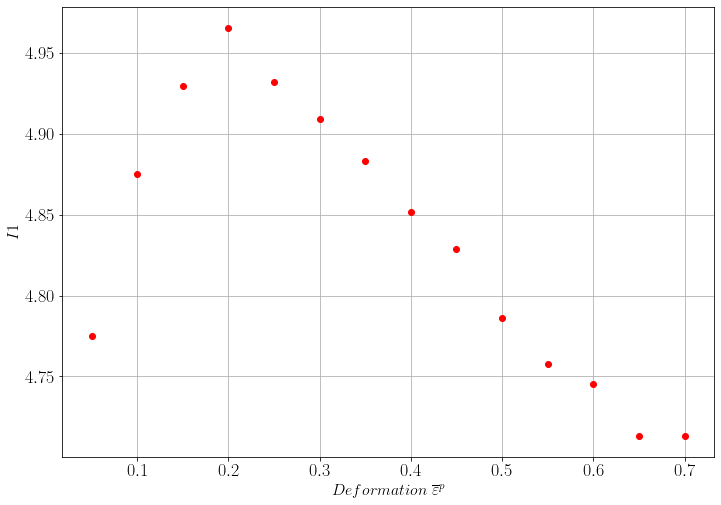

In [14]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, I1, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$I1$', fontsize = 16) # Labels the y axis
plt.show()

Plot the curve of exp(I) to see if it looks good


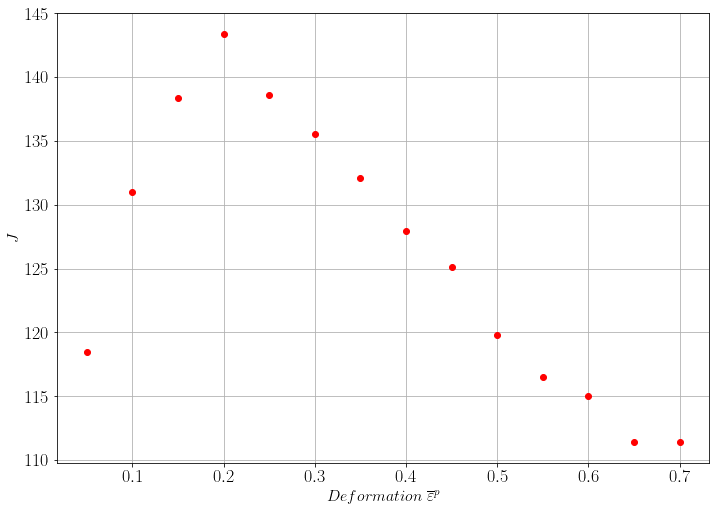

In [15]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, J, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$J$', fontsize = 16) # Labels the y axis
plt.show()

Plot the curve of S to see if it looks good


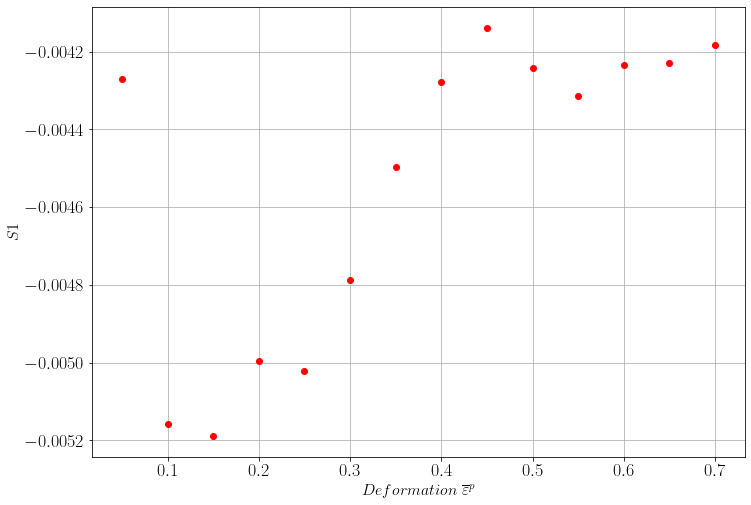

In [16]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, S1, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$S1$', fontsize = 16) # Labels the y axis
plt.show()

## Analytical formula of I1

Definition of the constitutive Law function to use for fitting


In [17]:
def functionI1(eps, A, B, n, m, p):
    return A + B * eps + n * eps**2 + m * eps**3 + p * eps**4 #+ q * eps**5 + r * eps**6 + s * eps**7 + t * eps**8 + u * eps**9 + v * eps**10 + w * eps**11

Identification

In [18]:
popt, pcov = curve_fit(functionI1, eps, I1)
A, B, n, m, p = popt
print("A=%g, B=%g, n=%g m=%g, p=%g" %(A, B, n, m, p))

A=4.61399, B=3.93537, n=-15.0626 m=20.7661, p=-10.0096


Plot the curves to see if they look good


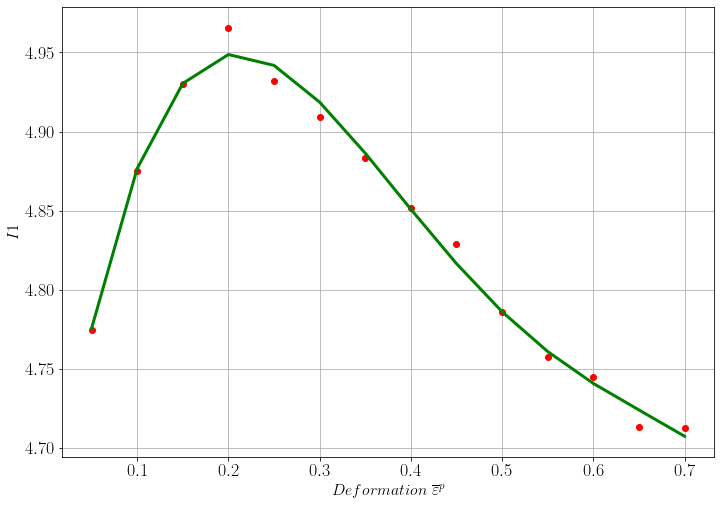

In [19]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, I1, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, functionI1(eps, A, B, n, m, p), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$I1$', fontsize = 16) # Labels the y axis
plt.show()

## Analytical formula of J

Definition of the constitutive Law function to use for fitting

In [20]:
def functionJ(eps,  d1, d2, d3, d4, d5):
    return d1 + d2 * eps + d3 * eps**2 + d4 * eps**3 + d5 * eps**4 #+ d6 * eps**5 + d7 * eps**6 + d8 * eps**7 + d9 * eps**8 + d10 * eps**9 + d11 * eps**10 + d12 * eps**11

Identification

In [21]:
popt, pcov = curve_fit(functionJ, eps, J)
d1, d2, d3, d4, d5 = popt
print("d1=%g, d2=%g, d3=%g, d4=%g, d5=%g" %(d1, d2, d3, d4, d5))

d1=97.0477, d2=520.246, d3=-2014.98, d4=2817.53, d5=-1372.42


Plot the curves to see if they look good

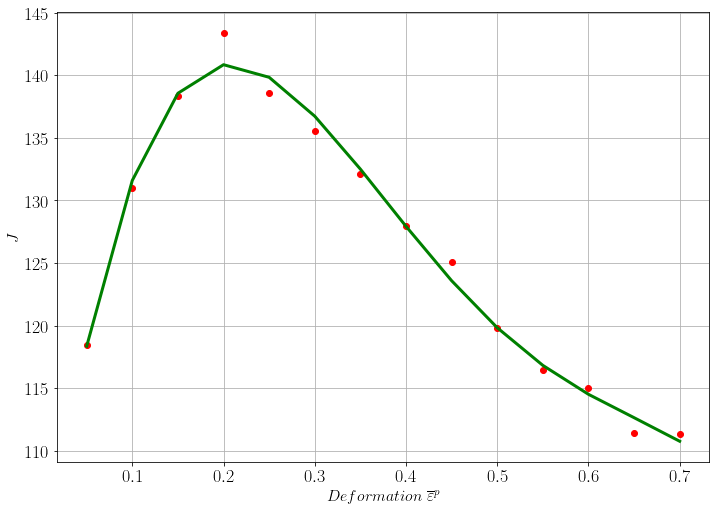

In [22]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, J, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, functionJ(eps, d1, d2, d3, d4, d5), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$J$', fontsize = 16) # Labels the y axis
plt.show()

## Analytical formula of S1

In [23]:
def functionS1(eps, d13, d14, d15, d16, d17):
    return d13 + d14 * eps + d15 * eps**2 + d16 * eps**3 + d17 * eps**4 #+ d18 * eps**5 #+ d19 * eps**6 + d20 * eps**7 + d21 * eps**8 + d22 * eps**9 + d23 * eps**10  

In [24]:
popt, pcov = curve_fit(functionS1, eps, S1)
d13, d14, d15, d16, d17 = popt
print("d13=%g, d14=%g, d15=%g, d16=%g, d17=%g" %(d13, d14, d15, d16, d17))

d13=-0.00314613, d14=-0.0309245, d15=0.150395, d16=-0.262382, d17=0.153901


Plot the curves to see if they look good

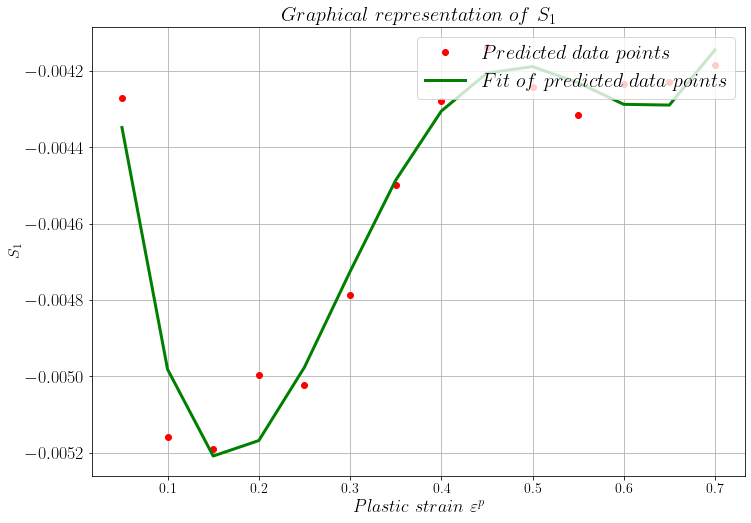

In [25]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, S1, colors[0], label = r'$Predicted\ data\ points$', marker='o', linestyle = 'none')
plt.plot(eps, functionS1(eps, d13, d14, d15, d16, d17), colors[1], label=r'$Fit\ of\ predicted\ data\ points$', linewidth = 3)
plt.xticks(fontsize=14)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Plastic\ strain\ \varepsilon^{p}$', fontsize = 18) # Labels the x axis
plt.ylabel(r'$S_{1}$', fontsize = 16) # Labels the y axis
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 20)
plt.title(r'$Graphical\ representation\ of\ S_1$', fontsize = 20) # Self explicit command
plt.show()

## Analytical formula of S2

In [26]:
def indenfunctionS2(t, S2):
    return S2*t 

In [27]:
def functionS2(T, d24, d25, d26, d27, d28):
    return d24 + d25 * T + d26 * T**2 + d27 * T**3 + d228 * T**4

In [28]:
d24 = []
d25 = []
d26 = []
d27 = []
d28 = []
for i in range(len(eps)):
    S2 = []
    for j in tp[0:]:
        dataSheetj = excelData1[str(j)]
        dataj = dataSheetj.values
        epsj = dataj[i,0] # extraction of epsilon which corresponds to index i 
        sigj = dataj[:, 1:]
        logsigj = np.log(sigj)
        sig_j = logsigj[i, :] - np.log(functionJ(epsj, d1, d2, d3, d4, d5)) - functionS1(epsj, d13, d14, d15, d16, d17) * (j - T0)
        popt, pcov = curve_fit(indenfunctionS2, np.log(ep), sig_j)
        S_j = popt
        S2.append(S_j)
    S2_params = np.polyfit(T, S2, 4)
    y28, y27, y26, y25, y24 = S2_params
    d24.append(y24)
    d25.append(y25)
    d26.append(y26)
    d27.append(y27)
    d28.append(y28)

/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/softwares/Anaconda3/lib/python3.8/site-packages/IPython/core/int

Plot the curve of d24 to see how it looks

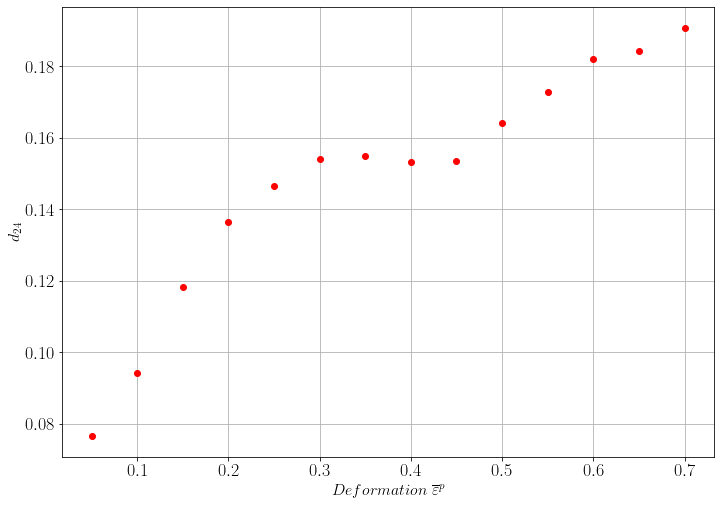

In [29]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d24, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{24}$', fontsize = 16) # Labels the y axis
plt.show()

Fit of d24

In [30]:
def fun24(eps, d240, d241, d242, d243, d244):
    return d240 + d241 * eps + d242 * eps**2 + d243 * eps**3 + d244 * eps**4 #+ d245 * eps**5 +  d246 * eps**6 + d247 * eps**7 

In [31]:
eps_j = np.linspace(eps.min(), eps.max(), 100)

In [32]:
d24_params = np.polyfit(eps, d24, 4)
d244, d243 , d242, d241, d240 = d24_params
print("d240=%g, d241=%g, d242=%g d243=%g, d244=%g" %(d240, d241, d242, d243, d244))

d240=0.0320655, d241=0.931646, d242=-2.78519 d243=3.81338, d244=-1.81207


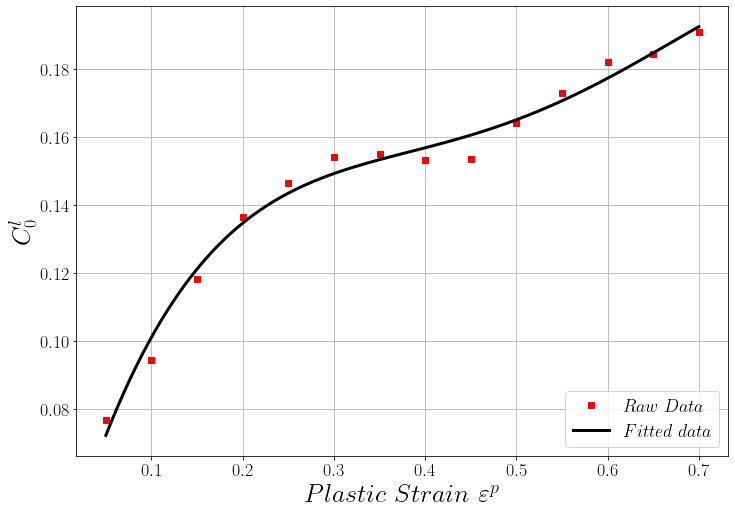

In [33]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d24, colors[0], marker='s', label=r'$Raw\ Data $',linestyle = 'none')
plt.plot(eps_j, fun24(eps_j, d240, d241, d242, d243, d244), color='black', label=r'$Fitted\ data$', linewidth = 3)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Plastic\ Strain\ \varepsilon^p$', fontsize = 26) # Labels the x axis
plt.ylabel(r'$C_0^l$', fontsize = 26) # Labels the y axis
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 18)
plt.show()

Plot the curve of d25 to see how it looks

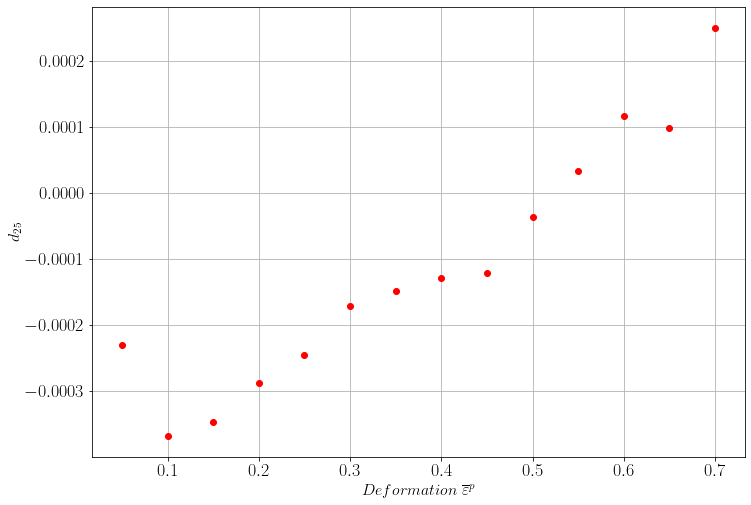

In [34]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d25, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{25}$', fontsize = 16) # Labels the y axis
plt.show()

Fit of d25

In [35]:
def fun25(eps, d250, d251, d252, d253, d254):
    return d250 + d251 * eps + d252 * eps**2 + d253 * eps**3 + d254 * eps**4 #+ d255 * eps**5 +  d256 * eps**6  +  d257 * eps**7 +  d258 * eps**8 +  d259 * eps**9  

In [36]:
d25_params = np.polyfit(eps, d25, 4)
d254, d253, d252, d251, d250 = d25_params
print("d250=%g, d251=%g, d252=%g, d253=%g, d254=%g" %(d250, d251, d252, d253, d254))

d250=-0.000124382, d251=-0.00361257, d252=0.0197465, d253=-0.0355911, d254=0.0226339


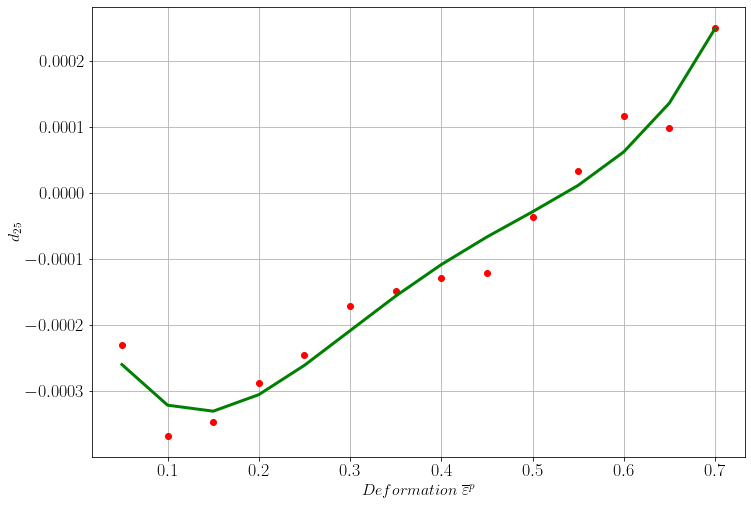

In [37]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d25, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, fun25(eps, d250, d251, d252, d253, d254), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{25}$', fontsize = 16) # Labels the y axis
plt.show()

Plot the curve of d26 to see how it looks

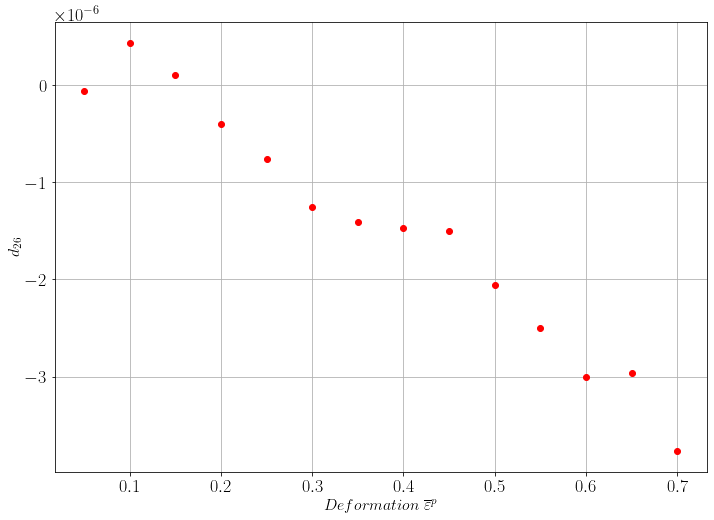

In [38]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d26, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{26}$', fontsize = 16) # Labels the y axis
plt.show()

Fit of d26

In [39]:
def fun26(eps, d260, d261, d262, d263, d264):
    return d260 + d261 * eps + d262 * eps**2 + d263 * eps**3 + d264 * eps**4 #+ d265 * eps**5 +  d266 * eps**6 +  d267 * eps**7 +  d268 * eps**8 +  d269 * eps**9 

In [40]:
d26_params = np.polyfit(eps, d26, 4)
d264, d263, d262, d261, d260 = d26_params
print("d260=%g, d261=%g, d262=%g, d263=%g, d264=%g" %(d260, d261, d262, d263, d264))

d260=-1.58096e-07, d261=9.38045e-06, d262=-7.72993e-05, d263=0.000153333, d264=-0.000103767


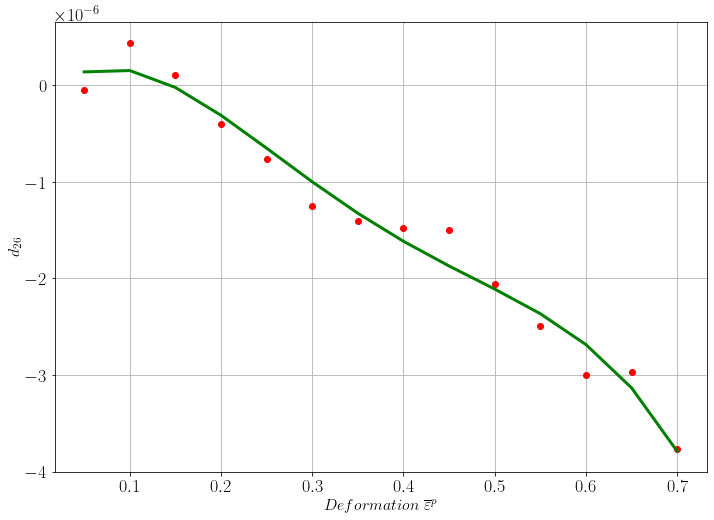

In [41]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d26, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, fun26(eps, d260, d261, d262, d263, d264), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{26}$', fontsize = 16) # Labels the y axis
plt.show()

Plot the curve of d27 to see how it looks

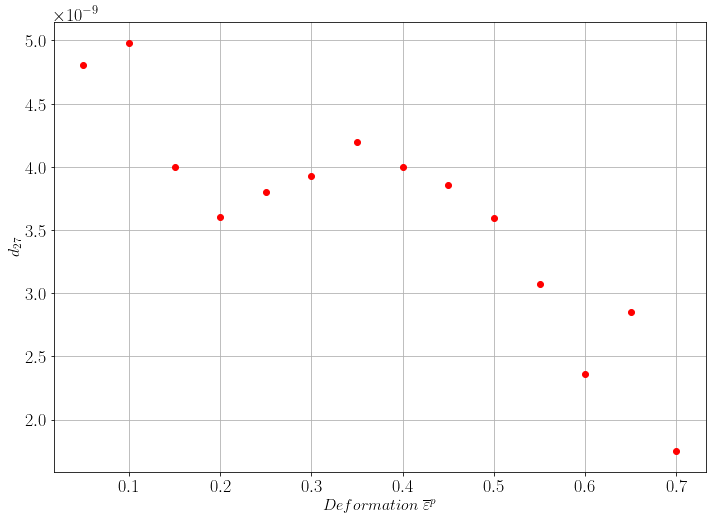

In [42]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d27, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{27}$', fontsize = 16) # Labels the y axis
plt.show()

Fit of d27

In [43]:
def fun27(eps, d270, d271, d272, d273, d274):
    return d270 + d271 * eps + d272 * eps**2 + d273 * eps**3 + d274 * eps**4 #+ d275 * eps**5 +  d276 * eps**6 +  d277 * eps**7 +  d278 * eps**8 +  d279 * eps**9 

In [44]:
d27_params = np.polyfit(eps, d27, 4)
d274, d273, d272, d271, d270 = d27_params
print("d270=%g, d271=%g, d272=%g, d273=%g, d274=%g" %(d270, d271, d272, d273, d274))

d270=6.17593e-09, d271=-2.76279e-08, d272=1.18037e-07, d273=-2.01407e-07, d274=1.09559e-07


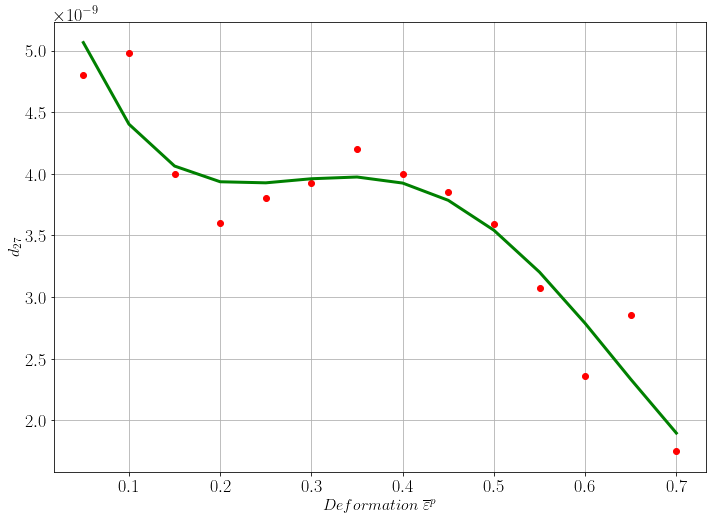

In [45]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d27, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, fun27(eps, d270, d271, d272, d273, d274), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{27}$', fontsize = 16) # Labels the y axis
plt.show()

Plot the curve of d28 to see how it looks

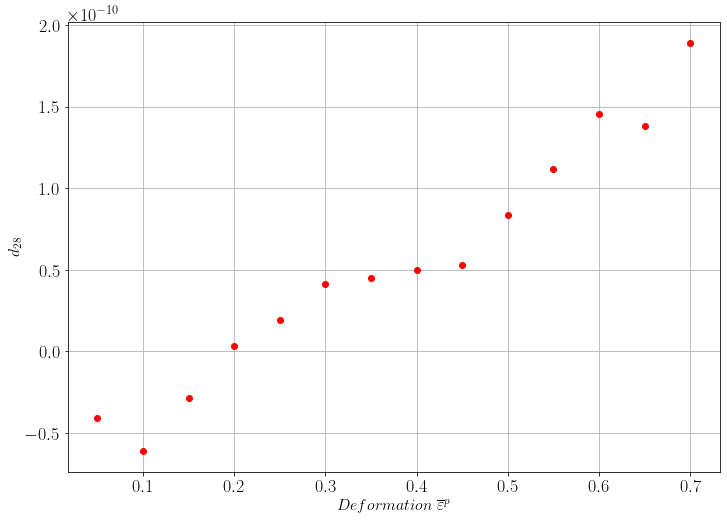

In [46]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d28, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{28}$', fontsize = 16) # Labels the y axis
plt.show()

Fit of d28

In [47]:
def fun28(eps, d280, d281, d282, d283, d284):
    return d280 + d281 * eps + d282 * eps**2 + d283 * eps**3 + d284 * eps**4 #+ d285 * eps**5 +  d286 * eps**6 +  d287 * eps**7 + d288 * eps**8 +  d289 * eps**9 

In [48]:
d28_params = np.polyfit(eps, d28, 4)
d284, d283, d282, d281, d280 = d28_params
print("d280=%g, d281=%g, d282=%g, d283=%g, d284=%g" %(d280, d281, d282, d283, d284))

d280=-6.40492e-11, d281=1.48898e-10, d282=1.29293e-09, d283=-3.37491e-09, d284=2.80075e-09


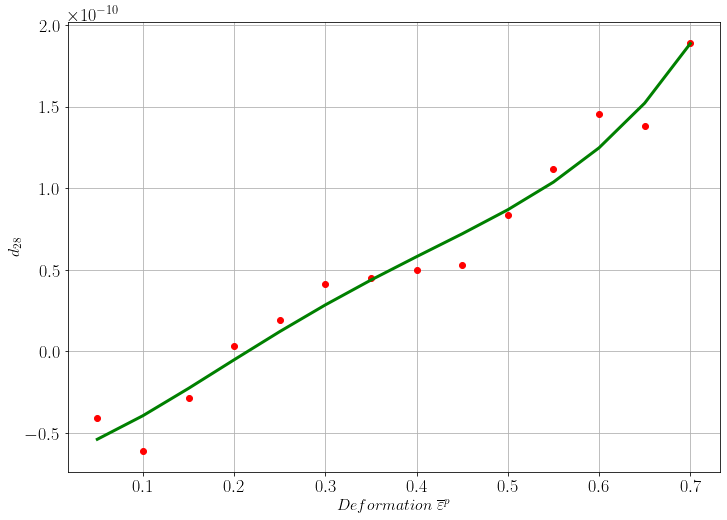

In [49]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(eps, d28, colors[0], marker='o', linestyle = 'none')
plt.plot(eps, fun28(eps,  d280, d281, d282, d283, d284), colors[1], label=r'$Ludwig\ law$', linewidth = 3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$d_{28}$', fontsize = 16) # Labels the y axis
plt.show()

## The last S2 value

Print S2 to see how it looks

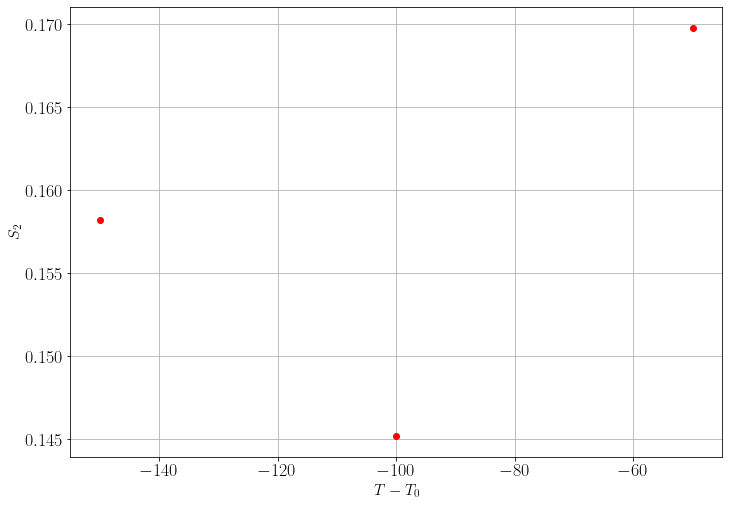

In [50]:
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(T, S2, colors[0], marker='o', linestyle = 'none')
plt.grid() # Plot the grid with default size
plt.xlabel(r'$T - T_{0}$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$S_{2}$', fontsize = 16) # Labels the y axis
plt.show()

## Plot the experimental results

In [51]:
# Read first sheet only for fourteen values  of strain
dataSheet = excelData[str(epsp[0])]
data = dataSheet.values
eps = data[:,0]

In [52]:
# Read first sheet
dataSheet_exp = excelData_exp[str(epsp[0])]
data_exp = dataSheet_exp.values
eps_exp = data_exp[:,0]
sig_exp = data_exp[:,1:]
# Append the other sheets
for T in epsp[1:]:
    dataSheet_exp = excelData_exp[str(T)]
    data_exp = dataSheet_exp.values
    sig_exp = np.append(sig_exp, data_exp[:,1:], axis=1)

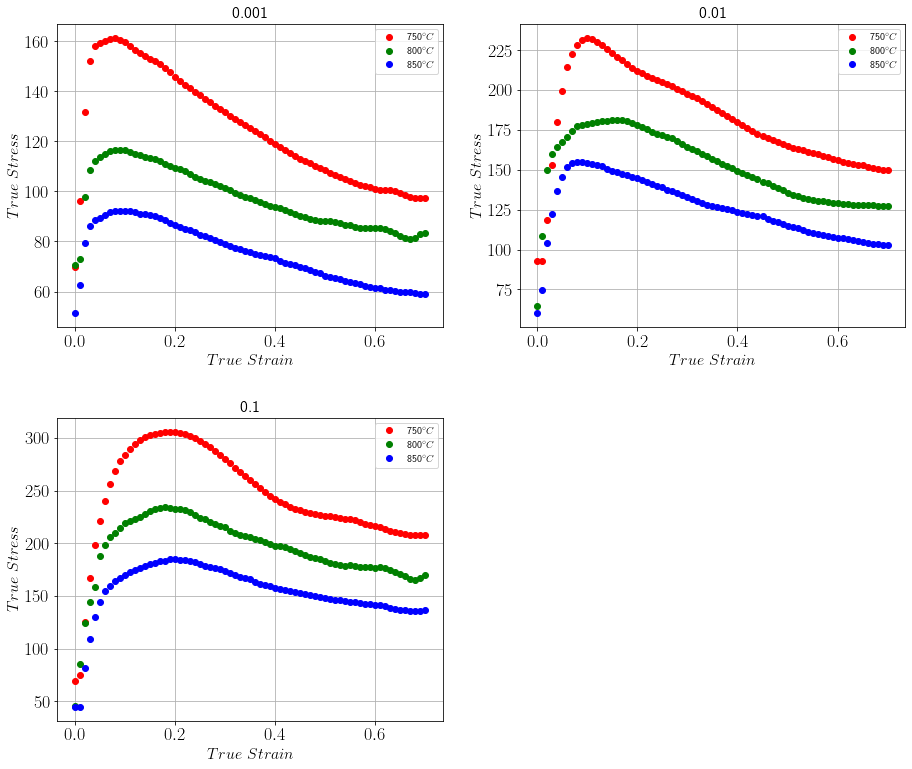

In [53]:
# Plot the curves
plt.figure(figsize = (15.2, 10.75))
plt.rc('text', usetex = True)
idx = 1
i = 0
plt.subplots_adjust(left  = 0.125, right = 0.9 , bottom = 0.1 , top = 1 , wspace = 0.2, hspace = 0.3)
for table in range(3):
    plt.subplot(2, 2, idx)
    for column in range(3):
        plt.plot(eps_exp, sig_exp[:,i], colors[column], label=  str(tp[column]) + r'$^{\circ}C$', marker='o', linestyle = 'none')
        i += 1
    plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$True\ Strain$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$True\ Stress$', fontsize = 16) # Labels the y axis
    plt.title(str(epsp[idx-1]), fontsize = 16) # Self explicit command
    idx += 1
plt.show()

Define the PTM model

In [54]:
def PTMLaw(eps, epsp, T):
    d24 = d240 + d241 * eps + d242 * eps**2 + d243 * eps**3 + d244 * eps**4 #+ d245 * eps**5 + d246 * eps**6 + d247 * eps**7
    d25 = d250 + d251 * eps + d252 * eps**2 + d253 * eps**3 + d254 * eps**4 #+ d255 * eps**5 + d256 * eps**6 + d257 * eps**7 + d258 * eps**8 + d259 * eps**9 
    d26 = d260 + d261 * eps + d262 * eps**2 + d263 * eps**3 + d264 * eps**4 #+ d265 * eps**5 + d266 * eps**6 + d267 * eps**7 + d268 * eps**8 + d269 * eps**9
    d27 = d270 + d271 * eps + d272 * eps**2 + d273 * eps**3 + d274 * eps**4 #+ d275 * eps**5 + d276 * eps**6 + d277 * eps**7 + d278 * eps**8 + d279 * eps**9
    d28 = d280 + d281 * eps + d282 * eps**2 + d283 * eps**3 + d284 * eps**4 #+ d285 * eps**5 + d286 * eps**6 + d287 * eps**7 + d288 * eps**8 + d289 * eps**9
    A = d1 + d2 * eps + d3 * eps**2 + d4 * eps**3 + d5 * eps**4 #+ d6 * eps**5 + d7 * eps**6 + d8 * eps**7 + d9 * eps**8 + d10 * eps**9 + d11 * eps**10 + d12 * eps**11
    B = d13 + d14 * eps + d15 * eps**2 + d16 * eps**3 + d17 * eps**4 #+ d18 * eps**5 + d19 * eps**6 + d20 * eps**7 + d21 * eps**8 + d22 * eps**9 + d23 * eps**10
    C = d24 + d25 * (T-T0) + d26 * (T-T0)**2 + d27 * (T-T0)**3 + d28 * (T-T0)**4
    return (A) * np.exp((B)*(T-T0) + (C) * np.log(epsp/epsp0))

Plot the data to check

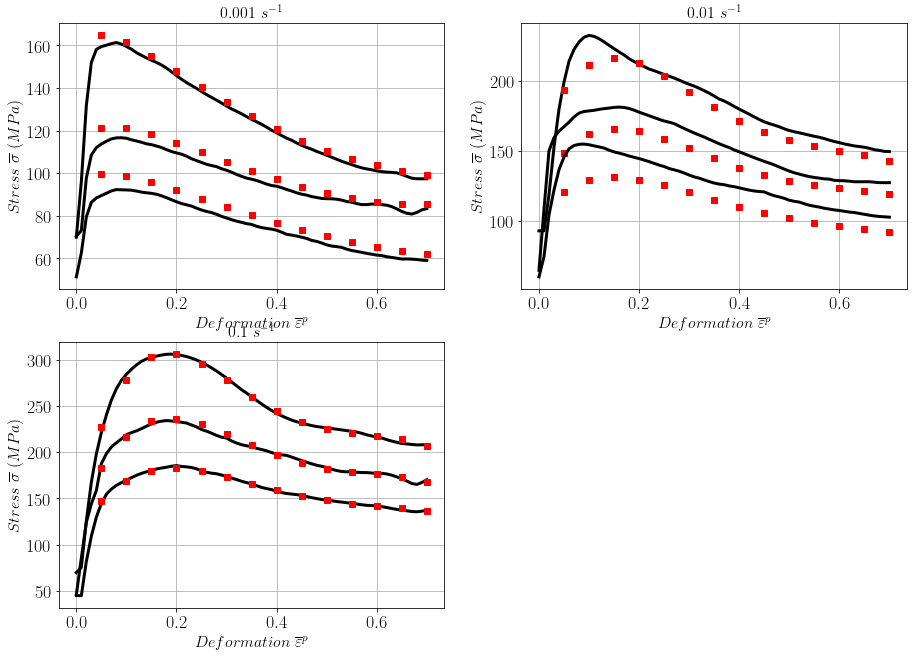

In [55]:
# Plot the curves
plt.figure(figsize = (15.2, 10.75))
plt.rc('text', usetex = True)
idx = 1
i = 0
for table in range(3):
    plt.subplot(2, 2, idx)
    for column in range(3):
        plt.plot(eps_exp, sig_exp[:,i], colors[5], label = 'EXP', linewidth = 3)
        plt.plot(eps, PTMLaw(eps, epsp[idx-1], tp[column]), colors[0],label = 'PTM', marker='s', linestyle = 'none')
        i += 1
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}\ (MPa)$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(epsp[idx-1]) + '\ s^{-1}$', fontsize = 16) # Self explicit command
    idx += 1
plt.show()

## Generation of Predicted Data

In [56]:
Tables = []
for epspi in epsp:
    TIZE_MHA = eps
    for T in tp:
        sig = PTMLaw(eps, epspi, T)
        TIZE_MHA = np.vstack((TIZE_MHA, sig))
    Tables.append(TIZE_MHA.T)

Plot the data to see how it looks like

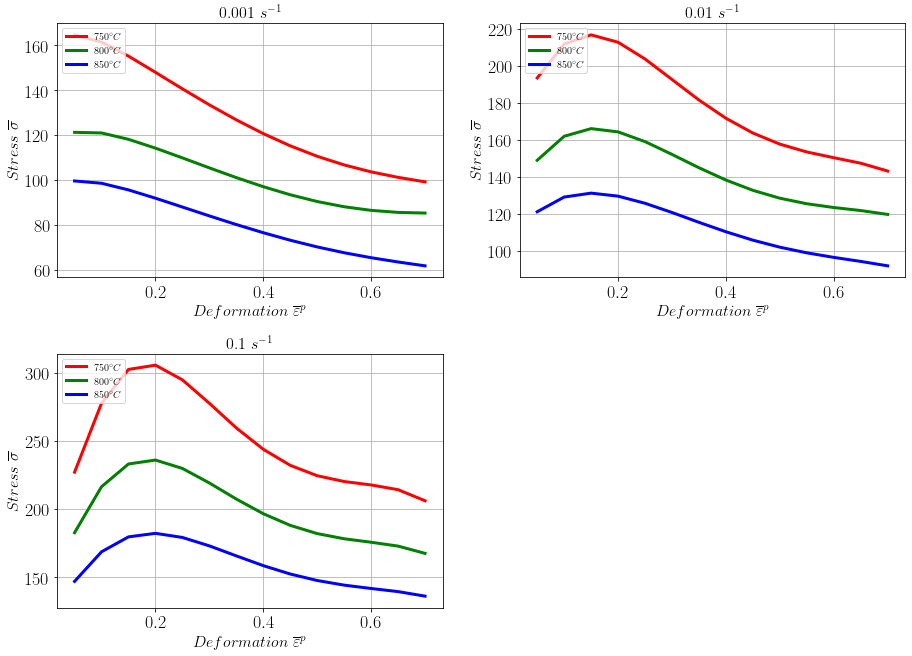

In [57]:
plt.figure(figsize = (15.2, 10.75))
plt.rc('text', usetex = True)
idx = 1
plt.subplots_adjust(hspace = 0.3)
for table in range(len(Tables)):
    plt.subplot(2, 2, idx)
    TIZE_MHA = Tables[table]
    # Plot the curves
    for column in range(1, TIZE_MHA.shape[1]):
        plt.plot(TIZE_MHA[:,0], TIZE_MHA[:,column], colors[column-1],label=r'$' + str(tp[column-1]) + '^{\circ}C$', linewidth = 3)
    plt.legend(loc = 'upper left',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(epsp[idx-1]) + '\ s^{-1}$', fontsize = 16) # Self explicit command
    idx += 1
plt.show()

Convert Array to Panda Data


In [58]:
data = []
for table in range(len(Tables)):
    # convert your array into a dataframe
    df = pd.DataFrame (Tables[table])

    # Name the columns
    for c in range(len(tp)):
        df.rename(columns={c+1:tp[c]}, inplace=True)
    df.rename(columns={0:'epsilon'}, inplace=True)
    data.append(df)

Export data to Excel file

In [59]:
# save to xlsx file
writer = pd.ExcelWriter('PredictedPTM.xlsx', engine='xlsxwriter')
for table in range(len(Tables)):
    data[table].to_excel(writer, index=False, sheet_name= str(epsp[table]))
writer.save()

## Program for calculating Error and correlation coefficient

Download Predicted Data

In [60]:
excelData2 = pd.read_excel('PredictedPTM.xlsx', None)

Experiment

In [61]:
# Read first sheet
dataSheet = excelData[str(epsp[0])]
data = dataSheet.values
eps = data[:,0]
sig = data[:,1:]
# Append the other sheets
for T in epsp[1:]:
    dataSheet = excelData[str(T)]
    data = dataSheet.values
    sig = np.append(sig, data[:,1:], axis=1)

Prediction

In [62]:
# Read first sheet
dataSheet2 = excelData2[str(epsp[0])]
data2 = dataSheet2.values
eps = data2[:,0]
sig2 = data2[:,1:]
# Append the other sheets
for S in epsp[1:]:
    dataSheet2 = excelData2[str(S)]
    data2 = dataSheet2.values
    sig2 = np.append(sig2, data2[:,1:], axis=1)

Flatten 

In [63]:
sflat1 = sig.flatten('F')
sflat1.shape

(126,)

In [64]:
sflat2 = sig2.flatten('F')
sflat2.shape

(126,)

Plot the data1 to check

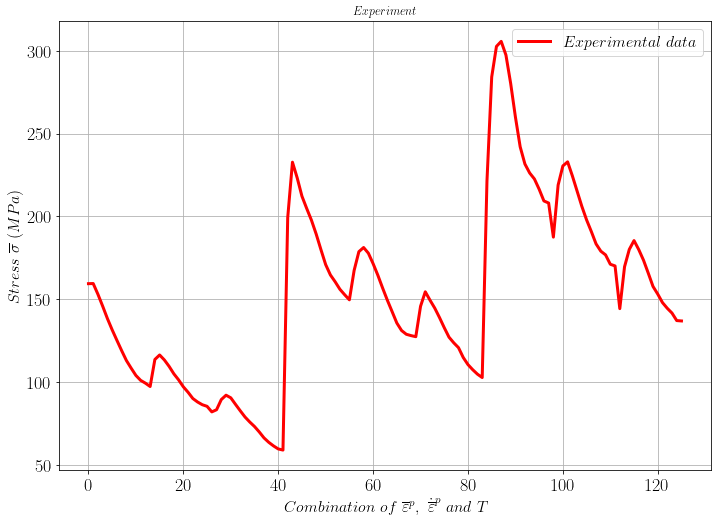

In [65]:
# Plot the curves
plt.figure(figsize = (11.69, 8.27)) # for a4 landscape (measures are in inches)
plt.rc('text', usetex=True)
plt.plot(sflat1, colors[0], label=r'$Experimental\ data$', linewidth = 3)
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1,fontsize=16)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Combination\ of\ \overline{\varepsilon}^{p},\ \dot{\overline{\varepsilon}}^p\ and\ T$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$Stress\ \overline{\sigma}\ (MPa)$', fontsize = 16) # Labels the y axis
plt.title(r'$Experiment$') # Self explicit command
plt.show()

Plot the data2 to check

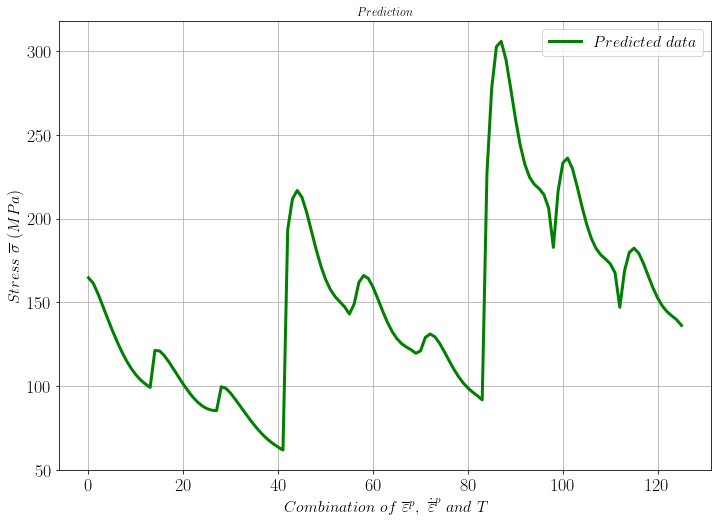

In [66]:
# Plot the curves
plt.figure(figsize = (11.69, 8.27)) # for a4 landscape (measures are in inches)
plt.rc('text', usetex=True)
plt.plot(sflat2, colors[1], label=r'$Predicted\ data$', linewidth = 3)
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1,fontsize=16)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Combination\ of\ \overline{\varepsilon}^{p},\ \dot{\overline{\varepsilon}}^p\ and\ T$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$Stress\ \overline{\sigma}\ (MPa)$', fontsize = 16) # Labels the y axis
plt.title(r'$Prediction$') # Self explicit command
plt.show()

Superposition

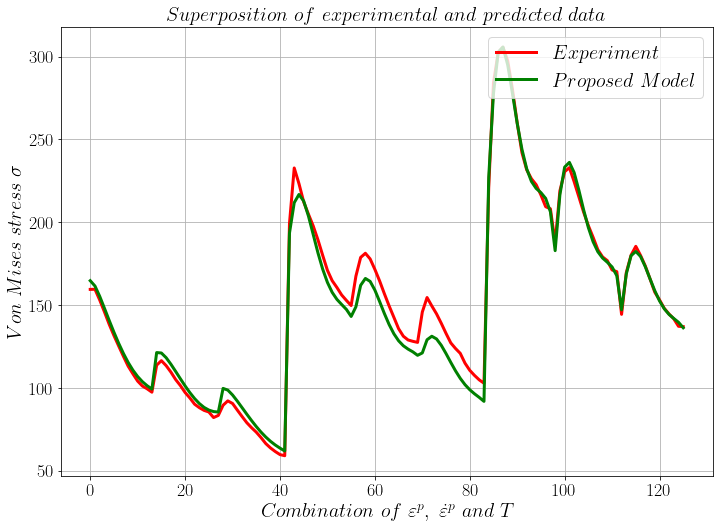

In [67]:
# Plot the curves
plt.figure(figsize = (11.69, 8.27)) # for a4 landscape (measures are in inches)
plt.rc('text', usetex=True)
plt.plot(sflat1, colors[0], label=r'$Experiment$', linewidth = 3)
plt.plot(sflat2, colors[1], label=r'$Proposed\ Model$', linewidth = 3)
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1,fontsize=20)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Combination\ of\ \varepsilon^{p},\ \dot{\varepsilon}^p\ and\ T$', fontsize = 20) # Labels the x axis
plt.ylabel(r'$Von\ Mises\ stress\ \sigma$', fontsize = 20) # Labels the y axis
plt.title(r'$Superposition\ of\ experimental\ and\ predicted\ data$', fontsize = 20, ) # Self explicit command
plt.show()

## Plot the experimental and predicted data to see their correlation

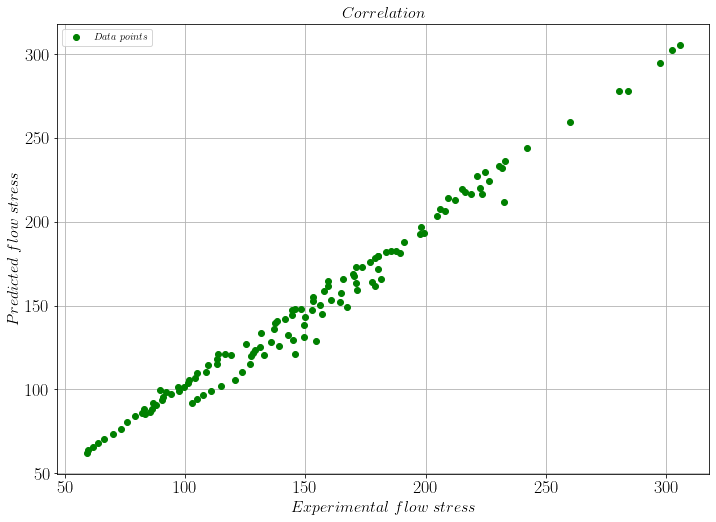

In [68]:
# Plot the curves
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(sflat1, sflat2, colors[1], label= r'$Data\ points$', marker='o', linestyle = 'none')
plt.legend(loc = 'upper left',fancybox = True, numpoints = 1, fontsize = 10)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Experimental\ flow\ stress$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$Predicted\ flow\ stress$', fontsize = 16) # Labels the y axis
plt.title(r'$Correlation$', fontsize = 16) # Self explicit command
plt.show()

## Fit

In [69]:
def fitFunction(t, a, b):
    return a + b * t
params = np.polyfit(sflat1, sflat2, 1)
b, a = params
print("a=%g, b=%g" %(a, b))

a=1.20843, b=0.976231


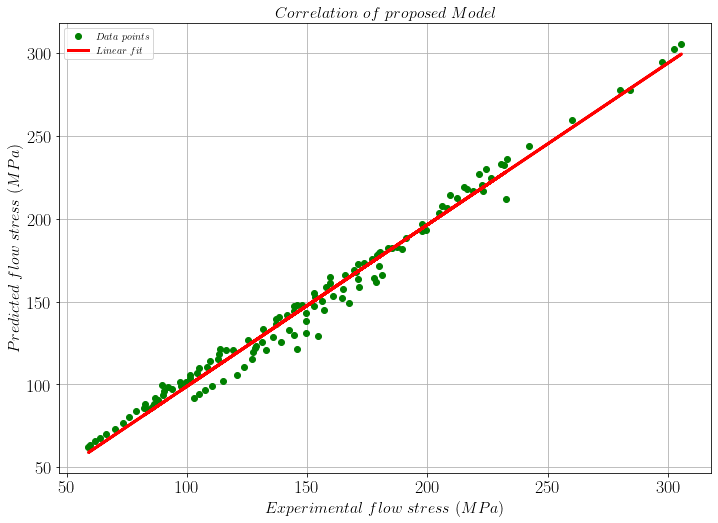

In [70]:
# Plot the curves
plt.figure(figsize = (11.69, 8.27))
plt.rc('text', usetex = True)
plt.plot(sflat1, sflat2, colors[1], label= r'$Data\ points$', marker='o', linestyle = 'none')
plt.plot(sflat1, fitFunction(sflat1, a, b), colors[0], label=r'$Linear\ fit$', linewidth = 3)
plt.legend(loc = 'upper left',fancybox = True, numpoints = 1, fontsize = 10)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Experimental\ flow\ stress\ (MPa)$', fontsize = 16) # Labels the x axis
plt.ylabel(r'$Predicted\ flow\ stress\ (MPa)$', fontsize = 16) # Labels the y axis
plt.title(r'$Correlation\ of\ proposed\ Model$', fontsize = 16) # Self explicit command
plt.show()

## Average Relative Error (AARE)

In [71]:
sigd = (sflat1 - sflat2) / sflat1 # Difference between experimental and predicted data
sigd.shape[0]

126

In [72]:
AARE = sum(abs(sigd))/sigd.shape[0] * 100 # Calculating average relative error
print("AARE=%g" %(AARE) + '%')

AARE=4.10451%


## Correlation coefficient (R)

In [73]:
Num = sum ((sflat1 - np.mean(sflat1)) * (sflat2 - np.mean(sflat2))) # Calculating numerator of fraction
Deno = np.sqrt(sum((sflat1 - np.mean(sflat1))**2) * sum((sflat2 - np.mean(sflat2))**2)) # Denomenator of fraction
R = (Num / Deno )* 100 # Calculating correlaton coefficient
print("R=%g" %(R)+ '%' )

R=99.1569%
